<a href="https://colab.research.google.com/github/Hipsteryoda/cat_dog_img_classifier/blob/main/fcc_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [4]:
# Variables for pre-processing and training.
epochs = 30
batch = 128
height = 150
width = 150
dim = (height, width)
scale = 1.0 / 255.0

In [5]:
# 3
# train_image_generator = None
# validation_image_generator = None
# test_image_generator = None

# train_data_gen = None
# val_data_gen = None
# test_data_gen = None

training_images = ImageDataGenerator(rescale=scale,
                                     rotation_range=90,
                                     width_shift_range=0.3,
                                     height_shift_range=0.3,
                                     brightness_range=(0.5, 1.5),
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

validation_images = ImageDataGenerator(rescale=scale)
testing_images = ImageDataGenerator(rescale=scale)

training_data = \
    training_images.flow_from_directory(batch_size=batch,
                                        directory=train_dir,
                                        target_size=dim,
                                        class_mode='binary')
validation_data = \
    validation_images.flow_from_directory(batch_size=batch,
                                          target_size=dim,
                                          directory=validation_dir)
testing_data = \
    testing_images.flow_from_directory(batch_size=batch,
                                       target_size=dim,
                                       directory=PATH,
                                       classes=['test'],
                                       shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


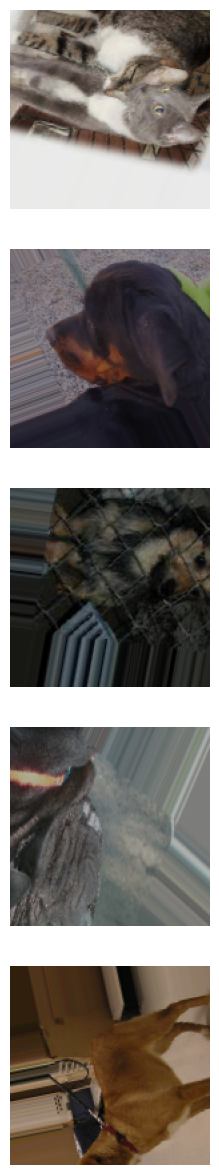

In [7]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(training_data)
plotImages(sample_training_images[:5])


In [ ]:
# 5
# train_image_generator = None


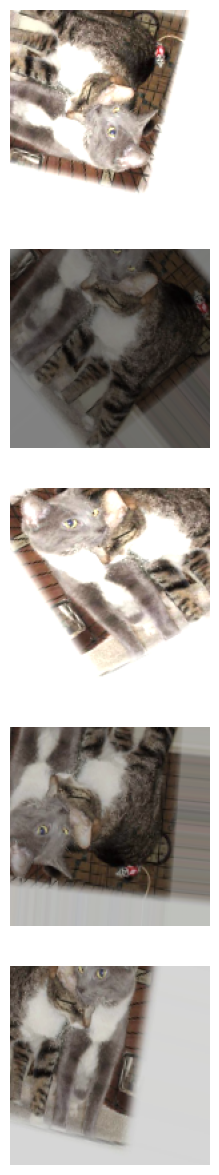

In [10]:
# 6
# train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
#                                                      directory=train_dir,
#                                                      target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      class_mode='binary')

augmented_images = [training_data[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [12]:
# 7
model = Sequential()
model.add(tf.keras.layers.Input(shape=(height, width, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(metrics=['accuracy'],
              optimizer='rmsprop',
              loss='binary_crossentropy')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)      

In [13]:
# 8
history = model.fit(x=training_data,
                    epochs=epochs,
                    steps_per_epoch=2000 // batch,
                    validation_data=validation_data,
                    validation_steps=800 // batch)

Epoch 1/30
15/15 [==============================] - 118s 8s/step - loss: 0.6980 - accuracy: 0.5155 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 2/30
15/15 [==============================] - 113s 8s/step - loss: 0.6946 - accuracy: 0.5005 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 119s 8s/step - loss: 0.7100 - accuracy: 0.5208 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 4/30
15/15 [==============================] - 115s 8s/step - loss: 0.6935 - accuracy: 0.5091 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/30
15/15 [==============================] - 123s 8s/step - loss: 0.6919 - accuracy: 0.5331 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 6/30
15/15 [==============================] - 124s 8s/step - loss: 0.6933 - accuracy: 0.5310 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 7/30
15/15 [==============================] - 125s 8s/step - loss: 0.6978 - accuracy: 0.5208 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/30
15

In [14]:
model.save('/content/cats_and_dogs/first_pass_model.h5')

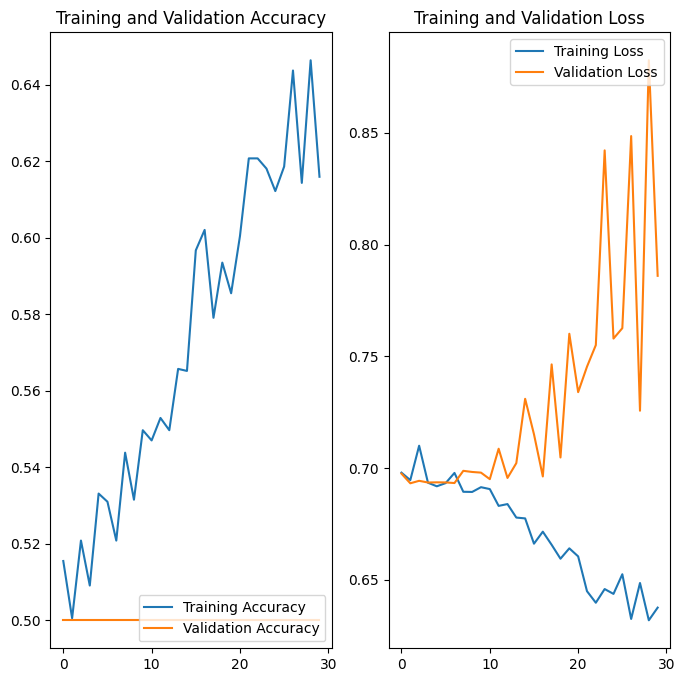

In [15]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 2s 2s/step


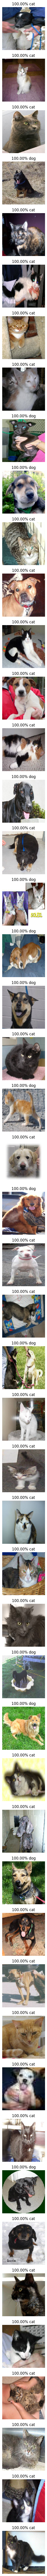

In [20]:
test_images, _ = next(testing_data)
probabilities = (model.predict(testing_data) > 0.5).astype("int32")
plotImages(test_images, probabilities=probabilities)

In [22]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]
correct = 0

for probability, answer in zip(probabilities, answers):
    print(probability)
    if np.round(probability, decimals=0) == answer:
        correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"Your model correctly identified {int(round(percentage_identified, 2) * 100)}% of the images of cats and dogs.")

if passed_challenge:
    print("You passed the challenge!")
else:
    print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
Your model correctly identified 72% of the images of cats and dogs.
You passed the challenge!
